In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Jan19_MECTune"

In [3]:
##Regular tune prior true and smearcept to be used


#Recall for comparison it will be the MEC tune for prior true

In [4]:
####Load in MECTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[55.65296047 88.49816025 61.76788115 34.69630318 17.91129467  8.12563115
  5.01588177  7.78328519]

[ 605.67932713 1339.24857443  521.27423304  191.82998478   67.71069855
   31.36349374   14.58706147    3.13445976]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_leptonMom_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[28.13687282 19.6151705  13.40456583  7.33735493  5.00524053  2.44188302
  1.16436337  2.70567606]

[223.55149261 385.16373543 115.05806545  42.66571382  12.55655181
   6.70147453   1.52686615   2.00407337]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[27.51608764 68.88298975 48.36331532 27.35894825 12.90605413  5.68374813
  3.8515184   5.07760913]

[382.12783452 954.084839   406.21616759 149.16427096  55.15414673
  24.66201921  13.06019532   1.13038639]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 27.51608764  68.88298975  48.36331532  27.35894825  12.90605413
   5.68374813   3.8515184    5.07760913 382.12783452 954.084839
 406.21616759 149.16427096  55.15414673  24.66201921  13.06019532
   1.13038639]
16


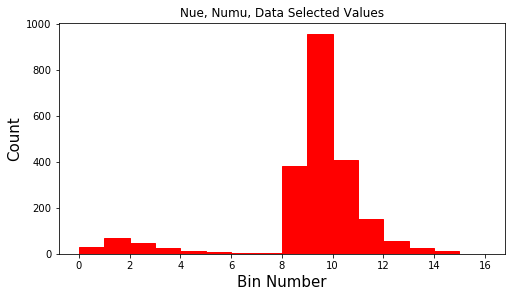

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_MECTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_MECTune_input_leptonMom_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19


In [10]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19_MECTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

#######################The regular tune bkg stat uncertainties

ending = "Jan19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[10.67268195  8.00393016  6.28283663  3.85090534  1.76200749  0.42217993
  0.33715813  0.45296553]

[4.19860321e+02 1.09607507e+03 5.95914478e+02 2.68434810e+02
 4.63746637e+01 3.12592038e+01 6.04318691e+01 7.45796274e-01]

[8.86804497 3.17666948 1.42344224 0.7432552  0.55003876 0.20502323
 0.09003998 0.33467734]

[ 76.24695033 112.01272668  33.72979711  18.96662017   4.00753197
   1.41609575   0.33281639   0.4749756 ]



In [11]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[19.54072692 11.18059964  7.70627886  4.59416054  2.31204625  0.62720317
  0.42719811  0.78764287]

[ 496.10727156 1208.0877956   629.64427501  287.40142999   50.38219566
   32.67529954   60.76468546    1.22077188]

[1.95407269e+01 1.11805996e+01 7.70627886e+00 4.59416054e+00
 2.31204625e+00 6.27203166e-01 4.27198108e-01 7.87642871e-01
 4.96107272e+02 1.20808780e+03 6.29644275e+02 2.87401430e+02
 5.03821957e+01 3.26752995e+01 6.07646855e+01 1.22077188e+00]


In [12]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [14]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_leptonMom_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[3.64878519e+01 5.93711506e+01 4.44128736e+01 2.64639001e+01
  1.20843139e+01 5.76037630e+00 3.87916865e+00 6.13289723e+00
  3.87686977e+02 8.62933209e+02 4.08509391e+02 1.50249311e+02
  4.85751844e+01 2.53417558e+01 1.70989532e+01 2.83590647e+00]
 [5.93711506e+01 1.24910192e+02 1.00211716e+02 6.03679030e+01
  2.49530533e+01 1.09492335e+01 8.66491016e+00 1.28282014e+01
  7.24639837e+02 1.67421803e+03 9.67037537e+02 3.47772615e+02
  1.01546907e+02 6.08779301e+01 4.97378738e+01 4.17252721e+00]
 [4.44128736e+01 1.00211716e+02 8.35260009e+01 5.05295710e+01
  2.02357135e+01 8.55346482e+00 7.18849126e+00 1.04494830e+01
  5.76218700e+02 1.33630618e+03 8.28981476e+02 2.96421002e+02
  8.29405734e+01 5.16500417e+01 4.48816823e+01 3.05046000e+00]
 [2.64639001e+01 6.03679030e+01 5.05295710e+01 3.10570238e+01
  1.22903726e+01 5.21171441e+00 4.38647008e+00 6.34384894e+00
  3.48815046e+02 8.13378554e+02 5.08172536e+02 1.81825840e+02
  5.08107668e+01 3.15249997e+01 2.76336730e+01 1.90574257e+00]
 [1.

In [15]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_lepton_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 1.45646466e+01  5.62352737e-01 -2.91406389e+01 -7.34568165e+00
  -8.50085556e+00 -1.46219802e+00  5.41895830e-01 -8.81703917e+00
   2.89331760e+02 -4.31882831e+01 -9.23385161e+01  6.71478333e+01
   1.40672945e+00 -6.20269949e+00 -5.44815022e+00 -4.08305741e+00]
 [ 5.62352737e-01  2.17128922e-02 -1.12514354e+00 -2.83622685e-01
  -3.28224880e-01 -5.64566434e-02  2.09230345e-02 -3.40432984e-01
   1.11713323e+01 -1.66753440e+00 -3.56526448e+00  2.59263193e+00
   5.43149572e-02 -2.39491224e-01 -2.10357469e-01 -1.57650135e-01]
 [-2.91406389e+01 -1.12514354e+00  5.83039781e+01  1.46970855e+01
   1.70083332e+01  2.92553508e+00 -1.08421379e+00  1.76409467e+01
  -5.78888906e+02  8.64102093e+01  1.84748963e+02 -1.34347974e+02
  -2.81455473e+00  1.24102308e+01  1.09005445e+01  8.16929547e+00]
 [-7.34568165e+00 -2.83622685e-01  1.46970855e+01  3.70479561e+00
   4.28740774e+00  7.37459786e-01 -2.73305241e-01  4.44687499e+00
  -1.45924515e+02  2.17820169e+01  4.65709441e+01 -3.38660195e+01
  -7.09

In [16]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

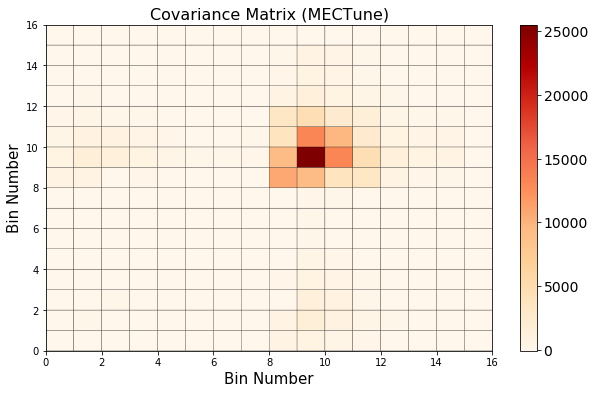

In [17]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (MECTune)', fontsize=16)


plt.savefig("data_covmat_MC_MECTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [18]:
np.savetxt("data_covmat_MC_MECTune_input_leptonMom_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')